In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')
gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
#cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_7 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_8 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_9 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               ]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               ]
obs_dict

{Timestamp('1991-01-15 00:00:00'): 27.016666666666666,
 Timestamp('1991-02-15 00:00:00'): 27.14,
 Timestamp('1991-03-15 00:00:00'): 27.46666666666667,
 Timestamp('1991-04-15 00:00:00'): 27.843333333333337,
 Timestamp('1991-05-15 00:00:00'): 28.153333333333332,
 Timestamp('1991-06-15 00:00:00'): 28.166666666666668,
 Timestamp('1991-07-15 00:00:00'): 27.94333333333333,
 Timestamp('1991-08-15 00:00:00'): 27.573333333333338,
 Timestamp('1991-09-15 00:00:00'): 27.416666666666668,
 Timestamp('1991-10-15 00:00:00'): 27.540000000000003,
 Timestamp('1991-11-15 00:00:00'): 27.923333333333332,
 Timestamp('1991-12-15 00:00:00'): 28.19,
 Timestamp('1992-01-15 00:00:00'): 28.4,
 Timestamp('1992-02-15 00:00:00'): 28.52333333333333,
 Timestamp('1992-03-15 00:00:00'): 28.736666666666668,
 Timestamp('1992-04-15 00:00:00'): 28.886666666666667,
 Timestamp('1992-05-15 00:00:00'): 28.766666666666666,
 Timestamp('1992-06-15 00:00:00'): 28.263333333333335,
 Timestamp('1992-07-15 00:00:00'): 27.573333333333338

In [177]:
#process gfdl data
def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset
    
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)
gfdl = gfdl[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GFDL_SPEAR']]
gfdl = gfdl.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the gfdl DataFrame
gfdl.loc[:, 'OBS_NINO3.4_L3'] = gfdl['TAR'].map(obs_dict)

gfdl_warm_onset_dfs = {}
gfdl_cold_onset_dfs = {}
gfdl_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    gfdl_warm_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1

gfdl_warm_onset = pd.concat([gfdl_warm_onset_dfs[key] for key in gfdl_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    gfdl_cold_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1
gfdl_cold_onset = pd.concat([gfdl_cold_onset_dfs[key] for key in gfdl_cold_onset_dfs.keys()], ignore_index=True)


gfdl_all_onset = pd.concat([gfdl_cold_onset,gfdl_warm_onset], ignore_index=True)

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_all_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM'] = gfdl_all_onset['LDC_SST_GFDL_SPEAR'] - gfdl_all_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_all_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_OBS'] = gfdl_all_onset['OBS_NINO3.4_L3'] - gfdl_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_all_onset['VARIANCE3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['SESS'] = 1-((gfdl_all_onset['ANOM']-gfdl_all_onset['ANOM_OBS'])*(gfdl_all_onset['ANOM']-gfdl_all_onset['ANOM_OBS'])/(gfdl_all_onset['VARIANCE3.4_L3']))

#4
gfdl_all_onset['Year'] = gfdl_all_onset['TAR'].dt.year
gfdl_all_onset['ONSET'] = gfdl_all_onset['Year'].astype(str) + ' ' + gfdl_all_onset['SZN']
gfdl_all_onset = gfdl_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]

#5
gfdl_all_onset['ANOM_ERR'] = (gfdl_all_onset['ANOM']- gfdl_all_onset['ANOM_OBS'])

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_warm_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM'] = gfdl_warm_onset['LDC_SST_GFDL_SPEAR'] - gfdl_warm_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_warm_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_OBS'] = gfdl_warm_onset['OBS_NINO3.4_L3'] - gfdl_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_warm_onset['VARIANCE3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['SESS'] = 1-((gfdl_warm_onset['ANOM']-gfdl_warm_onset['ANOM_OBS'])*(gfdl_warm_onset['ANOM']-gfdl_warm_onset['ANOM_OBS'])/(gfdl_warm_onset['VARIANCE3.4_L3']))

#4
gfdl_warm_onset['Year'] = gfdl_warm_onset['TAR'].dt.year
gfdl_warm_onset['ONSET'] = gfdl_warm_onset['Year'].astype(str) + ' ' + gfdl_warm_onset['SZN']
gfdl_warm_onset = gfdl_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]

#5
gfdl_warm_onset['ANOM_ERR'] = (gfdl_warm_onset['ANOM']- gfdl_warm_onset['ANOM_OBS'])

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_cold_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM'] = gfdl_cold_onset['LDC_SST_GFDL_SPEAR'] - gfdl_cold_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_cold_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_OBS'] = gfdl_cold_onset['OBS_NINO3.4_L3'] - gfdl_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_cold_onset['VARIANCE3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['SESS'] = 1-((gfdl_cold_onset['ANOM']-gfdl_cold_onset['ANOM_OBS'])*(gfdl_cold_onset['ANOM']-gfdl_cold_onset['ANOM_OBS'])/(gfdl_cold_onset['VARIANCE3.4_L3']))

#4
gfdl_cold_onset['Year'] = gfdl_cold_onset['TAR'].dt.year
gfdl_cold_onset['ONSET'] = gfdl_cold_onset['Year'].astype(str) + ' ' + gfdl_cold_onset['SZN']
gfdl_cold_onset = gfdl_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]

#5
gfdl_cold_onset['ANOM_ERR'] = (gfdl_cold_onset['ANOM']- gfdl_cold_onset['ANOM_OBS'])
    
gfdl_cold_onset


,L,MON,TAR,ONSET,SESS,ANOM,ANOM_OBS,ANOM_ERR
0,10.5,1994-10-01,1995-08-15,1995 JAS,0.980809,-0.453821,-0.559000,0.105179
1,9.5,1994-11-01,1995-08-15,1995 JAS,0.994139,-0.617124,-0.559000,-0.058124
2,8.5,1994-12-01,1995-08-15,1995 JAS,0.986260,-0.647994,-0.559000,-0.088994
3,7.5,1995-01-01,1995-08-15,1995 JAS,0.687731,-0.983268,-0.559000,-0.424268
4,6.5,1995-02-01,1995-08-15,1995 JAS,0.702273,-0.973272,-0.559000,-0.414272
...,...,...,...,...,...,...,...,...
85,5.5,2020-03-01,2020-08-15,2020 JAS,0.895971,-0.330786,-0.575667,0.244881
86,4.5,2020-04-01,2020-08-15,2020 JAS,0.990822,-0.502932,-0.575667,0.072735
87,3.5,2020-05-01,2020-08-15,2020 JAS,0.893363,-0.327735,-0.575667,0.247931
88,2.5,2020-06-01,2020-08-15,2020 JAS,0.997667,-0.612338,-0.575667,-0.036671


In [178]:
#process ncep data
def ncep_onset_finder(dict):

    ncep_temp = ncep.copy()

    # Query the DataFrame
    ncep_onset = ncep_temp[
        (ncep_temp['TAR'].dt.year == dict["year"]) &
        (ncep_temp['TAR'].dt.month == dict["month"]) &
        (ncep_temp['TAR'].dt.day == dict["day"])
    ]
    return ncep_onset
    
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]
ncep = ncep.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the ncep DataFrame
ncep.loc[:, 'OBS_NINO3.4_L3'] = ncep['TAR'].map(obs_dict)

ncep_warm_onset_dfs = {}
ncep_cold_onset_dfs = {}
ncep_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    ncep_warm_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_warm_onset = pd.concat([ncep_warm_onset_dfs[key] for key in ncep_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    ncep_cold_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1
ncep_cold_onset = pd.concat([ncep_cold_onset_dfs[key] for key in ncep_cold_onset_dfs.keys()], ignore_index=True)


ncep_all_onset = pd.concat([ncep_cold_onset,ncep_warm_onset], ignore_index=True)

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_all_onset['MEAN_SST_NCEP_CFSv2'] = ncep_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM'] = ncep_all_onset['LDC_SST_NCEP_CFSv2'] - ncep_all_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_all_onset['MEAN_OBS_NINO3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_OBS'] = ncep_all_onset['OBS_NINO3.4_L3'] - ncep_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_all_onset['VARIANCE3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['SESS'] = 1-((ncep_all_onset['ANOM']-ncep_all_onset['ANOM_OBS'])*(ncep_all_onset['ANOM']-ncep_all_onset['ANOM_OBS'])/(ncep_all_onset['VARIANCE3.4_L3']))

#4
ncep_all_onset['Year'] = ncep_all_onset['TAR'].dt.year
ncep_all_onset['ONSET'] = ncep_all_onset['Year'].astype(str) + ' ' + ncep_all_onset['SZN']
ncep_all_onset = ncep_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
ncep_all_onset['ANOM_ERR'] = (ncep_all_onset['ANOM']- ncep_all_onset['ANOM_OBS'])

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_warm_onset['MEAN_SST_NCEP_CFSv2'] = ncep_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM'] = ncep_warm_onset['LDC_SST_NCEP_CFSv2'] - ncep_warm_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_warm_onset['MEAN_OBS_NINO3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_OBS'] = ncep_warm_onset['OBS_NINO3.4_L3'] - ncep_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_warm_onset['VARIANCE3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['SESS'] = 1-((ncep_warm_onset['ANOM']-ncep_warm_onset['ANOM_OBS'])*(ncep_warm_onset['ANOM']-ncep_warm_onset['ANOM_OBS'])/(ncep_warm_onset['VARIANCE3.4_L3']))

#4
ncep_warm_onset['Year'] = ncep_warm_onset['TAR'].dt.year
ncep_warm_onset['ONSET'] = ncep_warm_onset['Year'].astype(str) + ' ' + ncep_warm_onset['SZN']
ncep_warm_onset = ncep_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
ncep_warm_onset['ANOM_ERR'] = (ncep_warm_onset['ANOM']- ncep_warm_onset['ANOM_OBS'])

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_cold_onset['MEAN_SST_NCEP_CFSv2'] = ncep_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM'] = ncep_cold_onset['LDC_SST_NCEP_CFSv2'] - ncep_cold_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_cold_onset['MEAN_OBS_NINO3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_OBS'] = ncep_cold_onset['OBS_NINO3.4_L3'] - ncep_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_cold_onset['VARIANCE3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['SESS'] = 1-((ncep_cold_onset['ANOM']-ncep_cold_onset['ANOM_OBS'])*(ncep_cold_onset['ANOM']-ncep_cold_onset['ANOM_OBS'])/(ncep_cold_onset['VARIANCE3.4_L3']))

#4
ncep_cold_onset['Year'] = ncep_cold_onset['TAR'].dt.year
ncep_cold_onset['ONSET'] = ncep_cold_onset['Year'].astype(str) + ' ' + ncep_cold_onset['SZN']
ncep_cold_onset = ncep_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
ncep_cold_onset['ANOM_ERR'] = (ncep_cold_onset['ANOM']- ncep_cold_onset['ANOM_OBS'])


#process nasa data
def nasa_onset_finder(dict):

    nasa_temp = nasa.copy()

    # Query the DataFrame
    nasa_onset = nasa_temp[
        (nasa_temp['TAR'].dt.year == dict["year"]) &
        (nasa_temp['TAR'].dt.month == dict["month"]) &
        (nasa_temp['TAR'].dt.day == dict["day"])
    ]
    return nasa_onset
    
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]
nasa = nasa.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nasa DataFrame
nasa.loc[:, 'OBS_NINO3.4_L3'] = nasa['TAR'].map(obs_dict)

nasa_warm_onset_dfs = {}
nasa_cold_onset_dfs = {}
nasa_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nasa_warm_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_warm_onset = pd.concat([nasa_warm_onset_dfs[key] for key in nasa_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nasa_cold_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1
nasa_cold_onset = pd.concat([nasa_cold_onset_dfs[key] for key in nasa_cold_onset_dfs.keys()], ignore_index=True)


nasa_all_onset = pd.concat([nasa_cold_onset,nasa_warm_onset], ignore_index=True)

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_all_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM'] = nasa_all_onset['LDC_SST_NASA_GEOSS2S'] - nasa_all_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_all_onset['MEAN_OBS_NINO3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_OBS'] = nasa_all_onset['OBS_NINO3.4_L3'] - nasa_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_all_onset['VARIANCE3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['SESS'] = 1-((nasa_all_onset['ANOM']-nasa_all_onset['ANOM_OBS'])*(nasa_all_onset['ANOM']-nasa_all_onset['ANOM_OBS'])/(nasa_all_onset['VARIANCE3.4_L3']))

#4
nasa_all_onset['Year'] = nasa_all_onset['TAR'].dt.year
nasa_all_onset['ONSET'] = nasa_all_onset['Year'].astype(str) + ' ' + nasa_all_onset['SZN']
nasa_all_onset = nasa_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nasa_all_onset['ANOM_ERR'] = (nasa_all_onset['ANOM']- nasa_all_onset['ANOM_OBS'])

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_warm_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM'] = nasa_warm_onset['LDC_SST_NASA_GEOSS2S'] - nasa_warm_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_warm_onset['MEAN_OBS_NINO3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_OBS'] = nasa_warm_onset['OBS_NINO3.4_L3'] - nasa_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_warm_onset['VARIANCE3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['SESS'] = 1-((nasa_warm_onset['ANOM']-nasa_warm_onset['ANOM_OBS'])*(nasa_warm_onset['ANOM']-nasa_warm_onset['ANOM_OBS'])/(nasa_warm_onset['VARIANCE3.4_L3']))

#4
nasa_warm_onset['Year'] = nasa_warm_onset['TAR'].dt.year
nasa_warm_onset['ONSET'] = nasa_warm_onset['Year'].astype(str) + ' ' + nasa_warm_onset['SZN']
nasa_warm_onset = nasa_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nasa_warm_onset['ANOM_ERR'] = (nasa_warm_onset['ANOM']- nasa_warm_onset['ANOM_OBS'])

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_cold_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM'] = nasa_cold_onset['LDC_SST_NASA_GEOSS2S'] - nasa_cold_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_cold_onset['MEAN_OBS_NINO3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_OBS'] = nasa_cold_onset['OBS_NINO3.4_L3'] - nasa_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_cold_onset['VARIANCE3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['SESS'] = 1-((nasa_cold_onset['ANOM']-nasa_cold_onset['ANOM_OBS'])*(nasa_cold_onset['ANOM']-nasa_cold_onset['ANOM_OBS'])/(nasa_cold_onset['VARIANCE3.4_L3']))

#4
nasa_cold_onset['Year'] = nasa_cold_onset['TAR'].dt.year
nasa_cold_onset['ONSET'] = nasa_cold_onset['Year'].astype(str) + ' ' + nasa_cold_onset['SZN']
nasa_cold_onset = nasa_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nasa_cold_onset['ANOM_ERR'] = (nasa_cold_onset['ANOM']- nasa_cold_onset['ANOM_OBS'])



#process canada data
def canada_onset_finder(dict):

    canada_temp = canada.copy()

    # Query the DataFrame
    canada_onset = canada_temp[
        (canada_temp['TAR'].dt.year == dict["year"]) &
        (canada_temp['TAR'].dt.month == dict["month"]) &
        (canada_temp['TAR'].dt.day == dict["day"])
    ]
    return canada_onset
    
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]
canada = canada.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canada DataFrame
canada.loc[:, 'OBS_NINO3.4_L3'] = canada['TAR'].map(obs_dict)

canada_warm_onset_dfs = {}
canada_cold_onset_dfs = {}
canada_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canada_warm_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_warm_onset = pd.concat([canada_warm_onset_dfs[key] for key in canada_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canada_cold_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1
canada_cold_onset = pd.concat([canada_cold_onset_dfs[key] for key in canada_cold_onset_dfs.keys()], ignore_index=True)


canada_all_onset = pd.concat([canada_cold_onset,canada_warm_onset], ignore_index=True)

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_all_onset['MEAN_SST_CanSIPS_IC4'] = canada_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM'] = canada_all_onset['LDC_SST_CanSIPS_IC4'] - canada_all_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_all_onset['MEAN_OBS_NINO3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_OBS'] = canada_all_onset['OBS_NINO3.4_L3'] - canada_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_all_onset['VARIANCE3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['SESS'] = 1-((canada_all_onset['ANOM']-canada_all_onset['ANOM_OBS'])*(canada_all_onset['ANOM']-canada_all_onset['ANOM_OBS'])/(canada_all_onset['VARIANCE3.4_L3']))

#4
canada_all_onset['Year'] = canada_all_onset['TAR'].dt.year
canada_all_onset['ONSET'] = canada_all_onset['Year'].astype(str) + ' ' + canada_all_onset['SZN']
canada_all_onset = canada_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canada_all_onset['ANOM_ERR'] = (canada_all_onset['ANOM']- canada_all_onset['ANOM_OBS'])

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_warm_onset['MEAN_SST_CanSIPS_IC4'] = canada_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM'] = canada_warm_onset['LDC_SST_CanSIPS_IC4'] - canada_warm_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_warm_onset['MEAN_OBS_NINO3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_OBS'] = canada_warm_onset['OBS_NINO3.4_L3'] - canada_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_warm_onset['VARIANCE3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['SESS'] = 1-((canada_warm_onset['ANOM']-canada_warm_onset['ANOM_OBS'])*(canada_warm_onset['ANOM']-canada_warm_onset['ANOM_OBS'])/(canada_warm_onset['VARIANCE3.4_L3']))

#4
canada_warm_onset['Year'] = canada_warm_onset['TAR'].dt.year
canada_warm_onset['ONSET'] = canada_warm_onset['Year'].astype(str) + ' ' + canada_warm_onset['SZN']
canada_warm_onset = canada_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canada_warm_onset['ANOM_ERR'] = (canada_warm_onset['ANOM']- canada_warm_onset['ANOM_OBS'])

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_cold_onset['MEAN_SST_CanSIPS_IC4'] = canada_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM'] = canada_cold_onset['LDC_SST_CanSIPS_IC4'] - canada_cold_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_cold_onset['MEAN_OBS_NINO3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_OBS'] = canada_cold_onset['OBS_NINO3.4_L3'] - canada_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_cold_onset['VARIANCE3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['SESS'] = 1-((canada_cold_onset['ANOM']-canada_cold_onset['ANOM_OBS'])*(canada_cold_onset['ANOM']-canada_cold_onset['ANOM_OBS'])/(canada_cold_onset['VARIANCE3.4_L3']))

#4
canada_cold_onset['Year'] = canada_cold_onset['TAR'].dt.year
canada_cold_onset['ONSET'] = canada_cold_onset['Year'].astype(str) + ' ' + canada_cold_onset['SZN']
canada_cold_onset = canada_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canada_cold_onset['ANOM_ERR'] = (canada_cold_onset['ANOM']- canada_cold_onset['ANOM_OBS'])



#process canesm data
def canesm_onset_finder(dict):

    canesm_temp = canesm.copy()

    # Query the DataFrame
    canesm_onset = canesm_temp[
        (canesm_temp['TAR'].dt.year == dict["year"]) &
        (canesm_temp['TAR'].dt.month == dict["month"]) &
        (canesm_temp['TAR'].dt.day == dict["day"])
    ]
    return canesm_onset
    
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]
canesm = canesm.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canesm DataFrame
canesm.loc[:, 'OBS_NINO3.4_L3'] = canesm['TAR'].map(obs_dict)

canesm_warm_onset_dfs = {}
canesm_cold_onset_dfs = {}
canesm_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    canesm_warm_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_warm_onset = pd.concat([canesm_warm_onset_dfs[key] for key in canesm_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canesm_cold_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1
canesm_cold_onset = pd.concat([canesm_cold_onset_dfs[key] for key in canesm_cold_onset_dfs.keys()], ignore_index=True)


canesm_all_onset = pd.concat([canesm_cold_onset,canesm_warm_onset], ignore_index=True)

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_all_onset['MEAN_SST_CanESM5'] = canesm_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM'] = canesm_all_onset['LDC_SST_CanESM5'] - canesm_all_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_all_onset['MEAN_OBS_NINO3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_OBS'] = canesm_all_onset['OBS_NINO3.4_L3'] - canesm_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_all_onset['VARIANCE3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['SESS'] = 1-((canesm_all_onset['ANOM']-canesm_all_onset['ANOM_OBS'])*(canesm_all_onset['ANOM']-canesm_all_onset['ANOM_OBS'])/(canesm_all_onset['VARIANCE3.4_L3']))

#4
canesm_all_onset['Year'] = canesm_all_onset['TAR'].dt.year
canesm_all_onset['ONSET'] = canesm_all_onset['Year'].astype(str) + ' ' + canesm_all_onset['SZN']
canesm_all_onset = canesm_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canesm_all_onset['ANOM_ERR'] = (canesm_all_onset['ANOM']- canesm_all_onset['ANOM_OBS'])
#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_warm_onset['MEAN_SST_CanESM5'] = canesm_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM'] = canesm_warm_onset['LDC_SST_CanESM5'] - canesm_warm_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_warm_onset['MEAN_OBS_NINO3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_OBS'] = canesm_warm_onset['OBS_NINO3.4_L3'] - canesm_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_warm_onset['VARIANCE3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['SESS'] = 1-((canesm_warm_onset['ANOM']-canesm_warm_onset['ANOM_OBS'])*(canesm_warm_onset['ANOM']-canesm_warm_onset['ANOM_OBS'])/(canesm_warm_onset['VARIANCE3.4_L3']))

#4
canesm_warm_onset['Year'] = canesm_warm_onset['TAR'].dt.year
canesm_warm_onset['ONSET'] = canesm_warm_onset['Year'].astype(str) + ' ' + canesm_warm_onset['SZN']
canesm_warm_onset = canesm_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canesm_warm_onset['ANOM_ERR'] = (canesm_warm_onset['ANOM']- canesm_warm_onset['ANOM_OBS'])

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_cold_onset['MEAN_SST_CanESM5'] = canesm_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM'] = canesm_cold_onset['LDC_SST_CanESM5'] - canesm_cold_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_cold_onset['MEAN_OBS_NINO3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_OBS'] = canesm_cold_onset['OBS_NINO3.4_L3'] - canesm_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_cold_onset['VARIANCE3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['SESS'] = 1-((canesm_cold_onset['ANOM']-canesm_cold_onset['ANOM_OBS'])*(canesm_cold_onset['ANOM']-canesm_cold_onset['ANOM_OBS'])/(canesm_cold_onset['VARIANCE3.4_L3']))

#4
canesm_cold_onset['Year'] = canesm_cold_onset['TAR'].dt.year
canesm_cold_onset['ONSET'] = canesm_cold_onset['Year'].astype(str) + ' ' + canesm_cold_onset['SZN']
canesm_cold_onset = canesm_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
canesm_cold_onset['ANOM_ERR'] = (canesm_cold_onset['ANOM']- canesm_cold_onset['ANOM_OBS'])



#process nemo data
def nemo_onset_finder(dict):

    nemo_temp = nemo.copy()

    # Query the DataFrame
    nemo_onset = nemo_temp[
        (nemo_temp['TAR'].dt.year == dict["year"]) &
        (nemo_temp['TAR'].dt.month == dict["month"]) &
        (nemo_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_onset
    
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]
nemo = nemo.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo DataFrame
nemo.loc[:, 'OBS_NINO3.4_L3'] = nemo['TAR'].map(obs_dict)

nemo_warm_onset_dfs = {}
nemo_cold_onset_dfs = {}
nemo_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    nemo_warm_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_warm_onset = pd.concat([nemo_warm_onset_dfs[key] for key in nemo_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_cold_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1
nemo_cold_onset = pd.concat([nemo_cold_onset_dfs[key] for key in nemo_cold_onset_dfs.keys()], ignore_index=True)


nemo_all_onset = pd.concat([nemo_cold_onset,nemo_warm_onset], ignore_index=True)

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_all_onset['MEAN_SST_GEM52_NEMO'] = nemo_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM'] = nemo_all_onset['LDC_SST_GEM52_NEMO'] - nemo_all_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_all_onset['MEAN_OBS_NINO3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_OBS'] = nemo_all_onset['OBS_NINO3.4_L3'] - nemo_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_all_onset['VARIANCE3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['SESS'] = 1-((nemo_all_onset['ANOM']-nemo_all_onset['ANOM_OBS'])*(nemo_all_onset['ANOM']-nemo_all_onset['ANOM_OBS'])/(nemo_all_onset['VARIANCE3.4_L3']))

#4
nemo_all_onset['Year'] = nemo_all_onset['TAR'].dt.year
nemo_all_onset['ONSET'] = nemo_all_onset['Year'].astype(str) + ' ' + nemo_all_onset['SZN']
nemo_all_onset = nemo_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nemo_all_onset['ANOM_ERR'] = (nemo_all_onset['ANOM']- nemo_all_onset['ANOM_OBS'])

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_warm_onset['MEAN_SST_GEM52_NEMO'] = nemo_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM'] = nemo_warm_onset['LDC_SST_GEM52_NEMO'] - nemo_warm_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_warm_onset['MEAN_OBS_NINO3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_OBS'] = nemo_warm_onset['OBS_NINO3.4_L3'] - nemo_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_warm_onset['VARIANCE3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['SESS'] = 1-((nemo_warm_onset['ANOM']-nemo_warm_onset['ANOM_OBS'])*(nemo_warm_onset['ANOM']-nemo_warm_onset['ANOM_OBS'])/(nemo_warm_onset['VARIANCE3.4_L3']))

#4
nemo_warm_onset['Year'] = nemo_warm_onset['TAR'].dt.year
nemo_warm_onset['ONSET'] = nemo_warm_onset['Year'].astype(str) + ' ' + nemo_warm_onset['SZN']
nemo_warm_onset = nemo_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nemo_warm_onset['ANOM_ERR'] = (nemo_warm_onset['ANOM']- nemo_warm_onset['ANOM_OBS'])

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_cold_onset['MEAN_SST_GEM52_NEMO'] = nemo_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM'] = nemo_cold_onset['LDC_SST_GEM52_NEMO'] - nemo_cold_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_cold_onset['MEAN_OBS_NINO3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_OBS'] = nemo_cold_onset['OBS_NINO3.4_L3'] - nemo_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_cold_onset['VARIANCE3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['SESS'] = 1-((nemo_cold_onset['ANOM']-nemo_cold_onset['ANOM_OBS'])*(nemo_cold_onset['ANOM']-nemo_cold_onset['ANOM_OBS'])/(nemo_cold_onset['VARIANCE3.4_L3']))

#4
nemo_cold_onset['Year'] = nemo_cold_onset['TAR'].dt.year
nemo_cold_onset['ONSET'] = nemo_cold_onset['Year'].astype(str) + ' ' + nemo_cold_onset['SZN']
nemo_cold_onset = nemo_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
nemo_cold_onset['ANOM_ERR'] = (nemo_cold_onset['ANOM']- nemo_cold_onset['ANOM_OBS'])



#process cola data
def cola_onset_finder(dict):

    cola_temp = cola.copy()

    # Query the DataFrame
    cola_onset = cola_temp[
        (cola_temp['TAR'].dt.year == dict["year"]) &
        (cola_temp['TAR'].dt.month == dict["month"]) &
        (cola_temp['TAR'].dt.day == dict["day"])
    ]
    return cola_onset
    
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]
cola = cola.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the cola DataFrame
cola.loc[:, 'OBS_NINO3.4_L3'] = cola['TAR'].map(obs_dict)

cola_warm_onset_dfs = {}
cola_cold_onset_dfs = {}
cola_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    cola_warm_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_warm_onset = pd.concat([cola_warm_onset_dfs[key] for key in cola_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    cola_cold_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1
cola_cold_onset = pd.concat([cola_cold_onset_dfs[key] for key in cola_cold_onset_dfs.keys()], ignore_index=True)


cola_all_onset = pd.concat([cola_cold_onset,cola_warm_onset], ignore_index=True)

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_all_onset['MEAN_SST_COLA_CESM1'] = cola_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM'] = cola_all_onset['LDC_SST_COLA_CESM1'] - cola_all_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_all_onset['MEAN_OBS_NINO3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_OBS'] = cola_all_onset['OBS_NINO3.4_L3'] - cola_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_all_onset['VARIANCE3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['SESS'] = 1-((cola_all_onset['ANOM']-cola_all_onset['ANOM_OBS'])*(cola_all_onset['ANOM']-cola_all_onset['ANOM_OBS'])/(cola_all_onset['VARIANCE3.4_L3']))

#4
cola_all_onset['Year'] = cola_all_onset['TAR'].dt.year
cola_all_onset['ONSET'] = cola_all_onset['Year'].astype(str) + ' ' + cola_all_onset['SZN']
cola_all_onset = cola_all_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
cola_all_onset['ANOM_ERR'] = (cola_all_onset['ANOM']- cola_all_onset['ANOM_OBS'])

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_warm_onset['MEAN_SST_COLA_CESM1'] = cola_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM'] = cola_warm_onset['LDC_SST_COLA_CESM1'] - cola_warm_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_warm_onset['MEAN_OBS_NINO3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_OBS'] = cola_warm_onset['OBS_NINO3.4_L3'] - cola_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_warm_onset['VARIANCE3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['SESS'] = 1-((cola_warm_onset['ANOM']-cola_warm_onset['ANOM_OBS'])*(cola_warm_onset['ANOM']-cola_warm_onset['ANOM_OBS'])/(cola_warm_onset['VARIANCE3.4_L3']))

#4
cola_warm_onset['Year'] = cola_warm_onset['TAR'].dt.year
cola_warm_onset['ONSET'] = cola_warm_onset['Year'].astype(str) + ' ' + cola_warm_onset['SZN']
cola_warm_onset = cola_warm_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
cola_warm_onset['ANOM_ERR'] = (cola_warm_onset['ANOM']- cola_warm_onset['ANOM_OBS'])

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_cold_onset['MEAN_SST_COLA_CESM1'] = cola_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM'] = cola_cold_onset['LDC_SST_COLA_CESM1'] - cola_cold_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_cold_onset['MEAN_OBS_NINO3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_OBS'] = cola_cold_onset['OBS_NINO3.4_L3'] - cola_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_cold_onset['VARIANCE3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['SESS'] = 1-((cola_cold_onset['ANOM']-cola_cold_onset['ANOM_OBS'])*(cola_cold_onset['ANOM']-cola_cold_onset['ANOM_OBS'])/(cola_cold_onset['VARIANCE3.4_L3']))

#4
cola_cold_onset['Year'] = cola_cold_onset['TAR'].dt.year
cola_cold_onset['ONSET'] = cola_cold_onset['Year'].astype(str) + ' ' + cola_cold_onset['SZN']
cola_cold_onset = cola_cold_onset[['L', 'MON','TAR','ONSET', 'SESS', 'ANOM', 'ANOM_OBS']]
#5
cola_cold_onset['ANOM_ERR'] = (cola_cold_onset['ANOM']- cola_cold_onset['ANOM_OBS'])

ncep_cold_onset




,L,MON,TAR,ONSET,SESS,ANOM,ANOM_OBS,ANOM_ERR
0,8.5,1994-12-01,1995-08-15,1995 JAS,0.999999,-0.559775,-0.559000,-0.000775
1,7.5,1995-01-01,1995-08-15,1995 JAS,0.904583,-0.793525,-0.559000,-0.234525
2,6.5,1995-02-01,1995-08-15,1995 JAS,0.999623,-0.544266,-0.559000,0.014734
3,5.5,1995-03-01,1995-08-15,1995 JAS,-0.669494,-1.540000,-0.559000,-0.981000
4,4.5,1995-04-01,1995-08-15,1995 JAS,-1.270137,-1.702938,-0.559000,-1.143938
...,...,...,...,...,...,...,...,...
67,5.5,2020-03-01,2020-08-15,2020 JAS,0.890921,-0.826420,-0.575667,-0.250753
68,4.5,2020-04-01,2020-08-15,2020 JAS,0.832682,-0.886228,-0.575667,-0.310561
69,3.5,2020-05-01,2020-08-15,2020 JAS,0.941754,-0.758903,-0.575667,-0.183236
70,2.5,2020-06-01,2020-08-15,2020 JAS,0.978293,-0.687528,-0.575667,-0.111861


In [179]:
gfdl_cold_err = gfdl_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
gfdl_cold_err.columns = ['L', 'ANOM_ERR']
gfdl_cold_err

gfdl_warm_err = gfdl_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
gfdl_warm_err.columns = ['L', 'ANOM_ERR']
gfdl_warm_err

ncep_cold_err = ncep_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
ncep_cold_err.columns = ['L', 'ANOM_ERR']
ncep_cold_err

ncep_warm_err = ncep_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
ncep_warm_err.columns = ['L', 'ANOM_ERR']
ncep_warm_err

cola_cold_err = cola_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
cola_cold_err.columns = ['L', 'ANOM_ERR']
cola_cold_err

cola_warm_err = cola_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
cola_warm_err.columns = ['L', 'ANOM_ERR']
cola_warm_err

canesm_cold_err = canesm_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
canesm_cold_err.columns = ['L', 'ANOM_ERR']
canesm_cold_err

canesm_warm_err = canesm_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
canesm_warm_err.columns = ['L', 'ANOM_ERR']
canesm_warm_err

nemo_cold_err = nemo_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
nemo_cold_err.columns = ['L', 'ANOM_ERR']
nemo_cold_err

nemo_warm_err = nemo_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
nemo_warm_err.columns = ['L', 'ANOM_ERR']
nemo_warm_err

nasa_cold_err = nasa_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
nasa_cold_err.columns = ['L', 'ANOM_ERR']
nasa_cold_err

nasa_warm_err = nasa_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
nasa_warm_err.columns = ['L', 'ANOM_ERR']
nasa_warm_err

canada_cold_err = canada_cold_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
canada_cold_err.columns = ['L', 'ANOM_ERR']
canada_cold_err

canada_warm_err = canada_warm_onset.groupby('L')['ANOM_ERR'].mean().reset_index()
canada_warm_err.columns = ['L', 'ANOM_ERR']
canada_warm_err

,L,ANOM_ERR
0,1.5,-0.162739
1,2.5,-0.230326
2,3.5,-0.258912
3,4.5,-0.322899
4,5.5,-0.409363
5,6.5,-0.395815
6,7.5,-0.299456
7,8.5,-0.428228
8,9.5,-0.537781
9,10.5,-0.543491


In [180]:
merged_err = gfdl_cold_err.merge(gfdl_warm_err, on='L', suffixes=('_gfdl_cold', '_gfdl_warm')) \
    .merge(ncep_cold_err, on='L', suffixes=('', '_ncep_cold')) \
    .merge(ncep_warm_err, on='L', suffixes=('', '_ncep_warm')) \
    .merge(cola_cold_err, on='L', suffixes=('', '_cola_cold')) \
    .merge(cola_warm_err, on='L', suffixes=('', '_cola_warm')) \
    .merge(canesm_cold_err, on='L', suffixes=('', '_canesm_cold')) \
    .merge(canesm_warm_err, on='L', suffixes=('', '_canesm_warm')) \
    .merge(nemo_cold_err, on='L', suffixes=('', '_nemo_cold')) \
    .merge(nemo_warm_err, on='L', suffixes=('', '_nemo_warm')) \
    .merge(nasa_cold_err, on='L', suffixes=('', '_nasa_cold')) \
    .merge(nasa_warm_err, on='L', suffixes=('', '_nasa_warm')) \
    .merge(canada_cold_err, on='L', suffixes=('', '_canada_cold')) \
    .merge(canada_warm_err, on='L', suffixes=('', '_canada_warm'))

# Now calculate the mean across all 'ANOM_ERR' columns for each row
merged_err['ANOM_ERR'] = merged_err.filter(like='ANOM_ERR').mean(axis=1)

# The resulting dataframe will have the 'Lead' Time and the averaged ANOM_ERR values
average_anom_err = merged_err[['L', 'ANOM_ERR']]

# Display the result
average_anom_err

,L,ANOM_ERR
0,1.5,-0.056450
1,2.5,-0.027780
2,3.5,-0.041326
3,4.5,-0.030369
4,5.5,0.032955
5,6.5,0.093593
6,7.5,0.126619


In [181]:
cold_merged_err = gfdl_cold_err.merge(gfdl_warm_err, on='L', suffixes=('_gfdl_cold', '_gfdl_warm')) \
    .merge(ncep_cold_err, on='L', suffixes=('', '_ncep_cold')) \
    .merge(cola_cold_err, on='L', suffixes=('', '_cola_cold')) \
    .merge(canesm_cold_err, on='L', suffixes=('', '_canesm_cold')) \
    .merge(nemo_cold_err, on='L', suffixes=('', '_nemo_cold')) \
    .merge(nasa_cold_err, on='L', suffixes=('', '_nasa_cold')) \
    .merge(canada_cold_err, on='L', suffixes=('', '_canada_cold')) \

# Now calculate the mean across all 'ANOM_ERR' columns for each row
cold_merged_err['ANOM_ERR'] = cold_merged_err.filter(like='ANOM_ERR').mean(axis=1)

# The resulting dataframe will have the 'Lead' Time and the averaged ANOM_ERR values
average_cold_anom_err = cold_merged_err[['L', 'ANOM_ERR']]

# Display the result
average_cold_anom_err


,L,ANOM_ERR
0,1.5,-0.008520
1,2.5,0.097921
2,3.5,0.061593
3,4.5,0.110952
4,5.5,0.314407
5,6.5,0.375605
6,7.5,0.435028


In [182]:
warm_merged_err = gfdl_warm_err.merge(gfdl_warm_err, on='L', suffixes=('_gfdl_warm', '_gfdl_warm')) \
    .merge(ncep_warm_err, on='L', suffixes=('', '_ncep_warm')) \
    .merge(cola_warm_err, on='L', suffixes=('', '_cola_warm')) \
    .merge(canesm_warm_err, on='L', suffixes=('', '_canesm_warm')) \
    .merge(nemo_warm_err, on='L', suffixes=('', '_nemo_warm')) \
    .merge(nasa_warm_err, on='L', suffixes=('', '_nasa_warm')) \
    .merge(canada_warm_err, on='L', suffixes=('', '_canada_warm')) \

# Now calculate the mean across all 'ANOM_ERR' columns for each row
warm_merged_err['ANOM_ERR'] = warm_merged_err.filter(like='ANOM_ERR').mean(axis=1)

# The resulting dataframe will have the 'Lead' Time and the averaged ANOM_ERR values
average_warm_anom_err = warm_merged_err[['L', 'ANOM_ERR']]

# Display the result
average_warm_anom_err


,L,ANOM_ERR
0,1.5,-0.167238
1,2.5,-0.220853
2,3.5,-0.210550
3,4.5,-0.233316
4,5.5,-0.338314
5,6.5,-0.305014
6,7.5,-0.299630


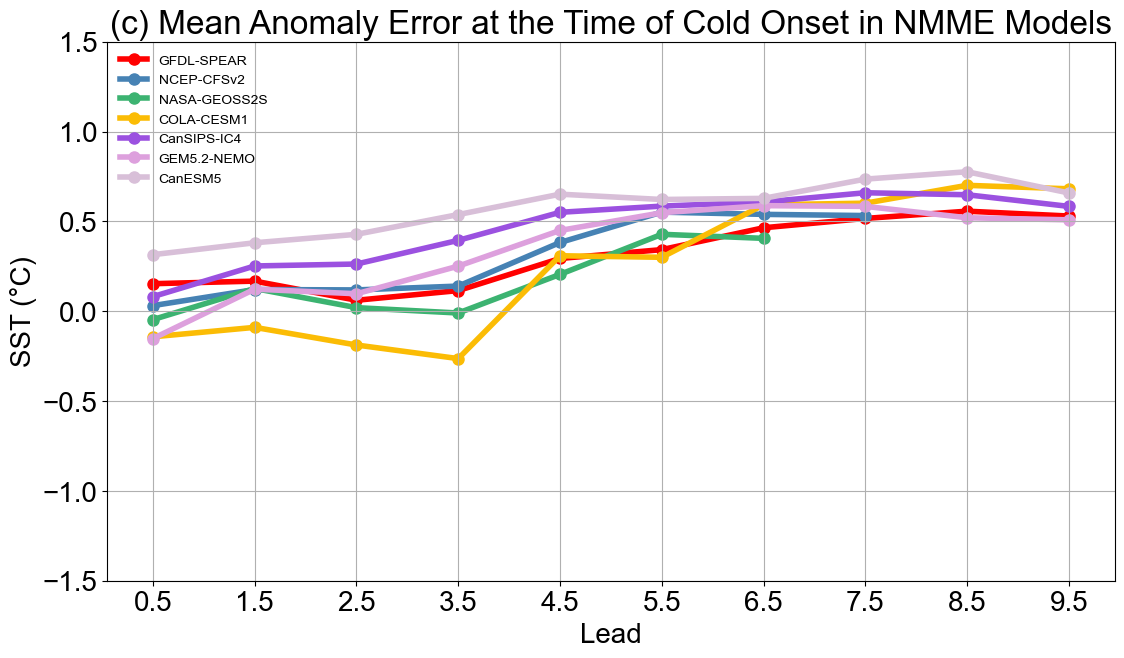

In [183]:
def cold_multimodel_anom_err_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))


    plt.plot(gfdl_cold_err['L'], gfdl_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR', zorder=1)
    plt.plot(ncep_cold_err['L'], ncep_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2', zorder=1)
    plt.plot(nasa_cold_err['L'], nasa_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S', zorder=1)
    plt.plot(cola_cold_err['L'], cola_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1', zorder=1)
    plt.plot(canada_cold_err['L'], canada_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4', zorder=1)
    plt.plot(nemo_cold_err['L'], nemo_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_cold_err['L'], canesm_cold_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
   
    
    # Customize the plot
    plt.title(f'(c) Mean Anomaly Error at the Time of Cold Onset in NMME Models', size = 24)
    plt.xlabel('Lead', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_cold_err['L']
    xticks_labels = gfdl_cold_err['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-1.5, ymax = 1.5)
    plt.savefig(f'../Plots/OnsetError/ANOMERR_COLD_nonabs.png', format='png')
    # Show the plot
    plt.show() 

cold_multimodel_anom_err_visualizer()


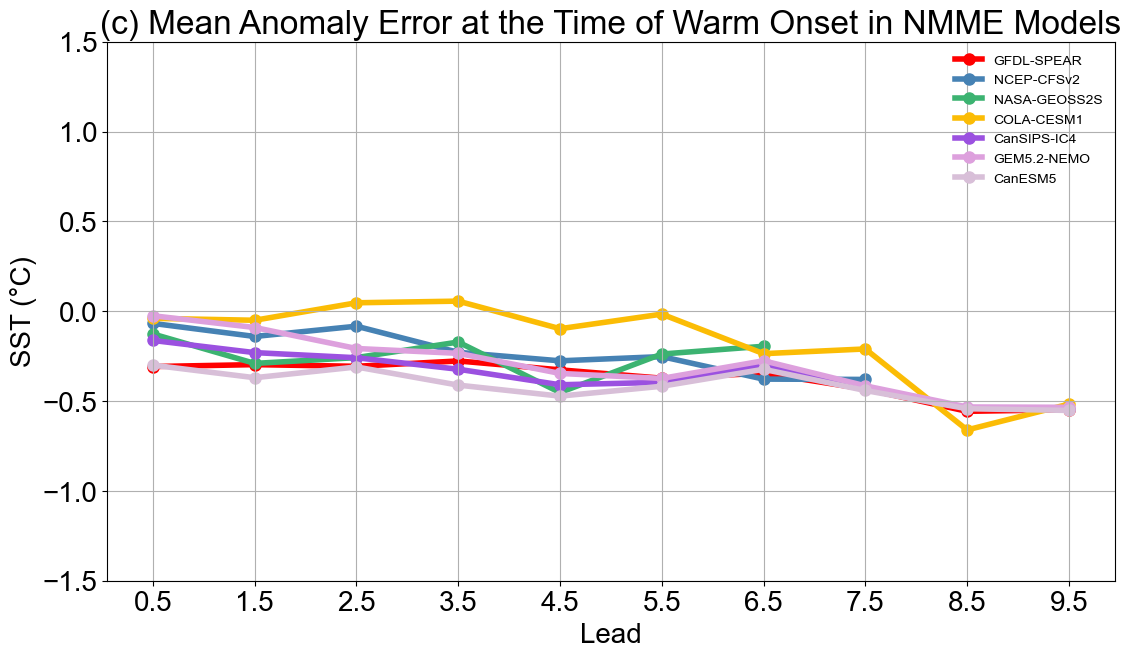

In [184]:
def warm_multimodel_anom_err_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    plt.plot(gfdl_warm_err['L'], gfdl_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'GFDL-SPEAR', zorder=1)
    plt.plot(ncep_warm_err['L'], ncep_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2', zorder=1)
    plt.plot(nasa_warm_err['L'], nasa_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S', zorder=1)
    plt.plot(cola_warm_err['L'], cola_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1', zorder=1)
    plt.plot(canada_warm_err['L'], canada_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4', zorder=1)
    plt.plot(nemo_warm_err['L'], nemo_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_warm_err['L'], canesm_warm_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    
    
    # Customize the plot
    plt.title(f'(c) Mean Anomaly Error at the Time of Warm Onset in NMME Models', size = 24)
    plt.xlabel('Lead', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_warm_err['L']
    xticks_labels = gfdl_warm_err['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-1.5, ymax = 1.5)
    plt.savefig(f'../Plots/OnsetError/ANOMERR_WARM_nonabs.png', format='png')
    # Show the plot
    plt.show() 

warm_multimodel_anom_err_visualizer()


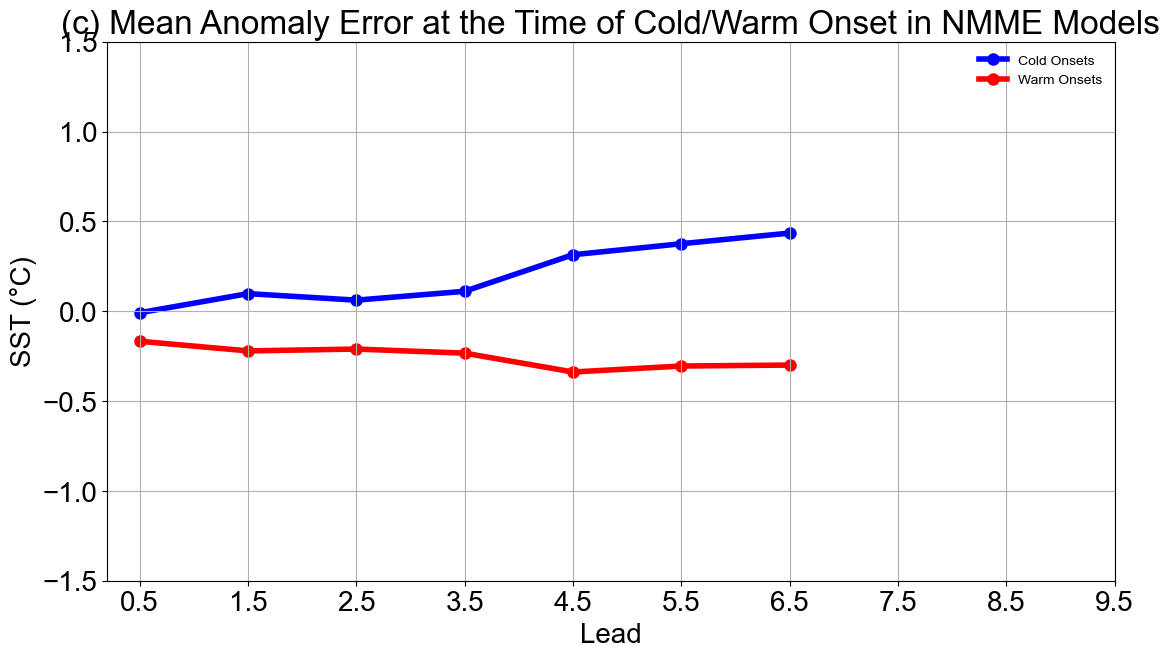

In [185]:
# plt.plot(average_anom_err['L'], average_anom_err['ANOM_ERR'], marker='o',markersize=8, linewidth=8, linestyle='-', color='black', label = 'Ensemble Mean', zorder=1)

def warm_multimodel_anom_err_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    plt.plot(average_cold_anom_err['L'], average_cold_anom_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='blue', label = 'Cold Onsets', zorder=1)
    plt.plot(average_warm_anom_err['L'], average_warm_anom_err['ANOM_ERR'], marker='o',markersize=8, linewidth=4, linestyle='-', color='red', label = 'Warm Onsets', zorder=1)

    
    # Customize the plot
    plt.title(f'(c) Mean Anomaly Error at the Time of Cold/Warm Onset in NMME Models', size = 24)
    plt.xlabel('Lead', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    
    xticks_positions = gfdl_warm_err['L']
    xticks_labels = gfdl_warm_err['L']-1
    plt.xticks(ticks=xticks_positions, labels=xticks_labels, size=20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-1.5, ymax = 1.5)
    plt.savefig(f'../Plots/OnsetError/ANOMERR_all_nonabs.png', format='png')
    # Show the plot
    plt.show() 

warm_multimodel_anom_err_visualizer()


In [186]:
cold_onset_order = ['2007 MJJ', '2010 MJJ', '1998 JJA', '1995 JAS', '2016 JAS', '2020 JAS', '2017 SON', '2005 OND','2008 OND']
warm_onset_order = ['1997 AMJ', '1991 MJJ', '2002 MJJ', '2004 JJA', '2009 JJA', '1994 ASO', '2006 ASO', '2018 ASO', '2014 SON']
gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)


cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)
cola_all_mesh = cola_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
cola_all_mesh = cola_all_mesh.fillna(np.nan)


ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)
ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)
ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)


nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)
nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)
nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)


canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)
canada_all_mesh = canada_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canada_all_mesh = canada_all_mesh.fillna(np.nan)


canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)
canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)


nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)
nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='TAR', values='ANOM_ERR')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)


gfdl_cold_mesh

TAR,1995-08-15,1998-07-15,2005-11-15,2007-06-15,2008-11-15,2010-06-15,2016-08-15,2017-10-15,2020-08-15
L,,,,,,,,,
1.5,-0.239656,-0.458600,0.395474,0.168692,0.417060,0.717292,0.295917,-0.031050,0.113941
2.5,-0.184088,-0.052197,0.271456,0.337138,0.371602,0.404168,-0.079704,0.476436,-0.036671
3.5,-0.791825,-0.129449,0.343341,0.274973,0.311068,0.165183,-0.393322,0.521392,0.247931
4.5,-0.185462,-0.000018,0.040063,0.273075,0.250810,0.284175,-0.437479,0.735358,0.072735
5.5,-0.209446,0.345990,-0.155841,0.330086,0.611536,0.545276,-0.124823,1.054765,0.244881
6.5,-0.414272,0.641695,-0.218375,0.460921,0.249862,0.771051,0.030641,1.337882,0.225594
7.5,-0.424268,0.569564,0.232753,0.349641,0.200830,1.021861,0.094405,1.633340,0.502198
8.5,-0.088994,0.483595,0.056232,0.687175,0.073549,1.089055,0.113999,1.227978,1.005922
9.5,-0.058124,0.263265,0.516535,0.677570,0.131312,1.226350,0.367600,1.122595,0.764263


In [187]:
gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)
cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)
cola_all_mesh = cola_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
cola_all_mesh = cola_all_mesh.fillna(np.nan)
ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)
ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)
ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)
#add NaN for ncep
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_cold_mesh.columns)
ncep_cold_mesh = pd.concat([ncep_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_warm_mesh.columns)
ncep_warm_mesh = pd.concat([ncep_warm_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_all_mesh.columns)
ncep_all_mesh = pd.concat([ncep_all_mesh, new_rows])

nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)
nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)
nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)
#add NaN for nasa
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_cold_mesh.columns)
nasa_cold_mesh = pd.concat([nasa_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_all_mesh.columns)
nasa_all_mesh = pd.concat([nasa_all_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_warm_mesh.columns)
nasa_warm_mesh = pd.concat([nasa_warm_mesh, new_rows])
nasa_cold_mesh = nasa_cold_mesh.reindex(columns=cold_onset_order)
nasa_warm_mesh = nasa_warm_mesh.reindex(columns=warm_onset_order)

canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)
canada_all_mesh = canada_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canada_all_mesh = canada_all_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_mesh.reindex(columns=cold_onset_order)
canada_warm_mesh = canada_warm_mesh.reindex(columns=warm_onset_order)
canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)
canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_mesh.reindex(columns=cold_onset_order)
canesm_warm_mesh = canesm_warm_mesh.reindex(columns=warm_onset_order)
nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)
nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='ONSET', values='ANOM_ERR')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_mesh.reindex(columns=cold_onset_order)
nemo_warm_mesh = nemo_warm_mesh.reindex(columns=warm_onset_order)
ncep_cold_mesh = ncep_cold_mesh.reindex(columns=cold_onset_order)
ncep_warm_mesh = ncep_warm_mesh.reindex(columns=warm_onset_order)
cola_cold_mesh = cola_cold_mesh.reindex(columns=cold_onset_order)
cola_warm_mesh = cola_warm_mesh.reindex(columns=warm_onset_order)
gfdl_cold_mesh = gfdl_cold_mesh.reindex(columns=cold_onset_order)
gfdl_warm_mesh = gfdl_warm_mesh.reindex(columns=warm_onset_order)
ncep_cold_mesh

ONSET,2007 MJJ,2010 MJJ,1998 JJA,1995 JAS,2016 JAS,2020 JAS,2017 SON,2005 OND,2008 OND
1.5,0.096662,0.343642,-1.038716,-0.419733,0.163260,0.004414,0.180861,0.288274,0.662361
2.5,0.189376,0.688046,-0.313731,-0.538028,-0.160594,-0.111861,0.494701,0.298549,0.540065
3.5,0.070995,0.682255,-0.053612,-0.791903,-0.531499,-0.183236,0.806980,0.392272,0.674748
4.5,0.077599,0.749159,-0.404400,-1.143938,0.497475,-0.310561,1.020202,0.141426,0.632283
5.5,0.388846,0.818136,-0.349908,-0.981000,1.396044,-0.250753,1.380819,0.285372,0.755269
6.5,0.348359,0.927649,0.092618,0.014734,1.158567,-0.243610,1.956402,0.069544,0.638970
7.5,0.333469,0.848959,0.214499,-0.234525,0.825959,0.064602,2.102606,0.133761,0.562408
8.5,0.415525,0.808085,0.149048,-0.000775,0.675118,0.613652,1.806435,0.018799,0.306896
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


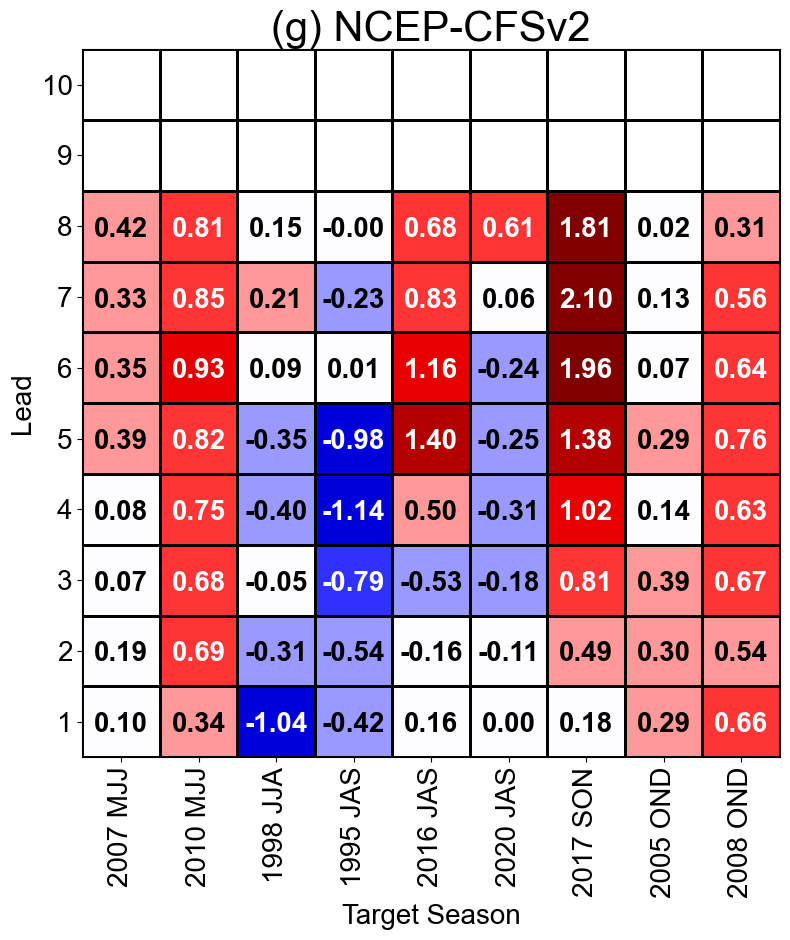

In [188]:


# Extract the x and y values
x = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#ustom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar
#cbar.ax.set_xticklabels(['> 1'] + [f'{b:.2f}' for b in boundaries[:1]])

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label-0.5)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/ncep_Cold_Onset_SESS.svg', format='svg')

plt.show()


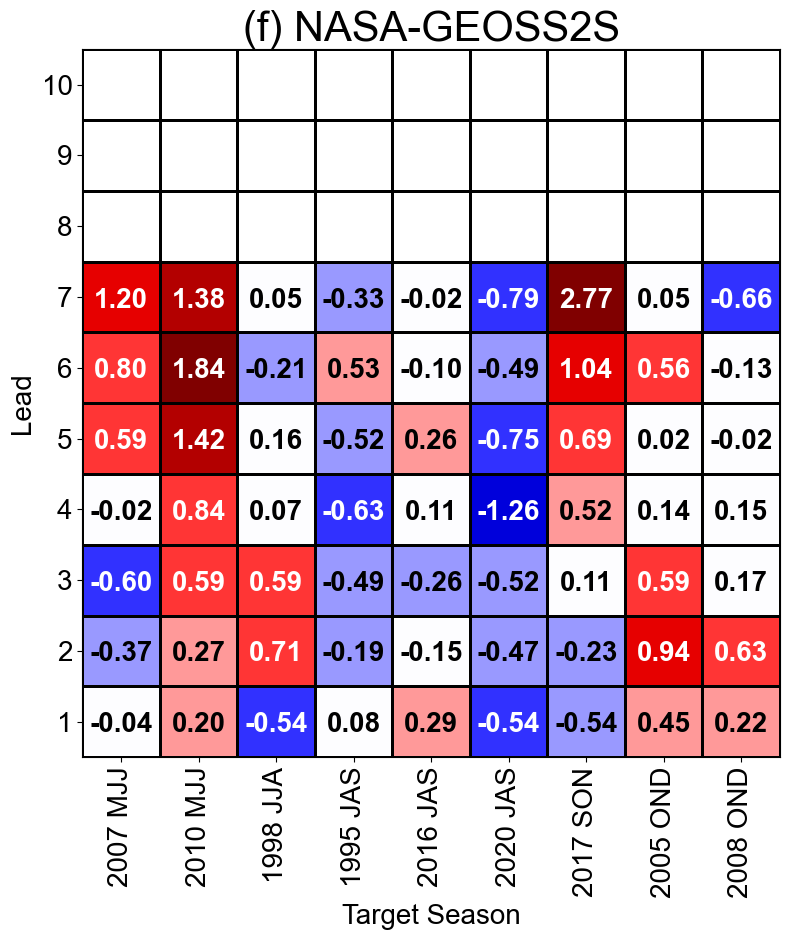

In [189]:
# nasa_cold 

# Extract the x and y values
x = np.arange(len(nasa_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nasa_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365) # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOM_ERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/nasa_Cold_Onset_ANOM_ERR.svg', format='svg')

plt.show()


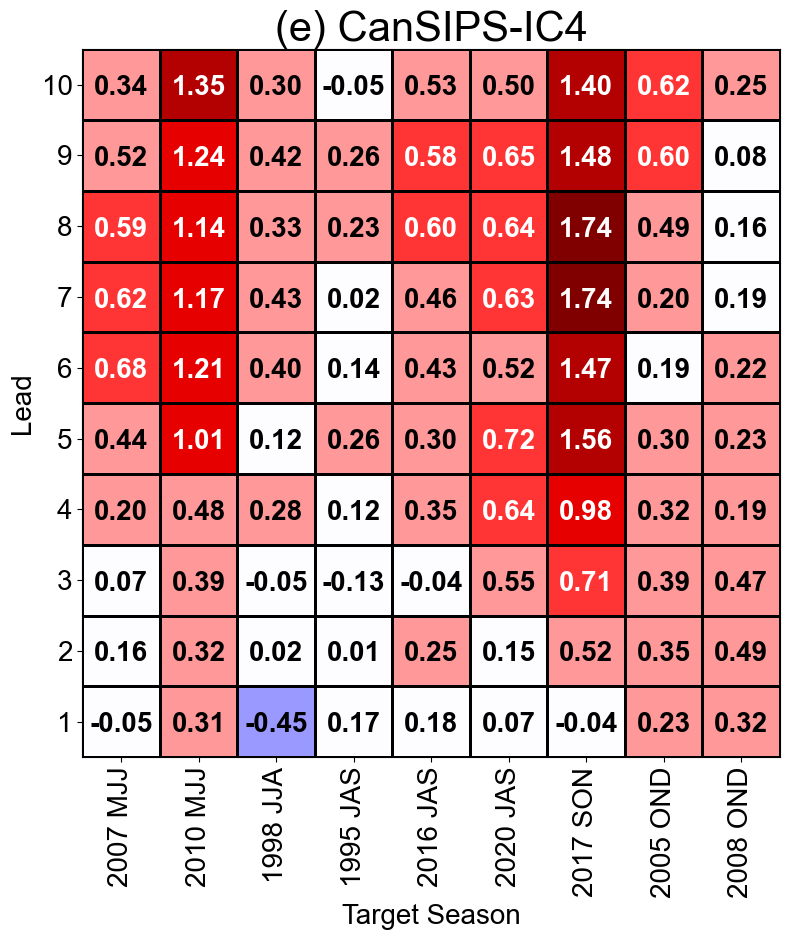

In [190]:
#canada_cold 

# Extract the x and y values
x = np.arange(len(canada_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canada_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOM_ERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/canada_Cold_Onset_ANOM_ERR.svg', format='svg')

plt.show()


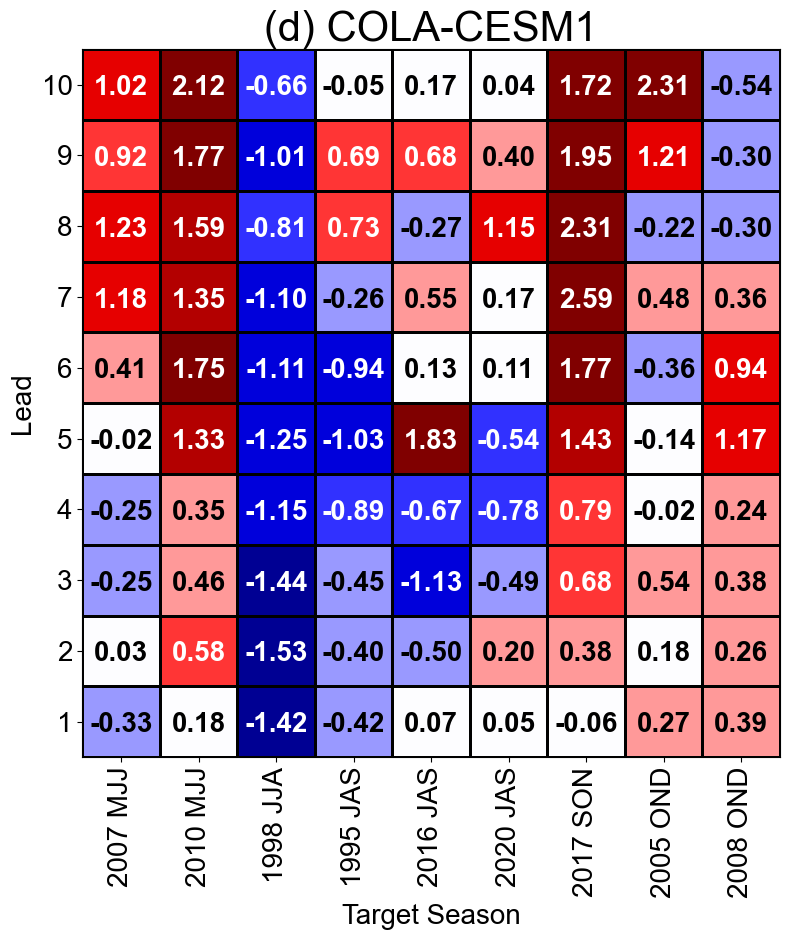

In [191]:
#cola_cold 

# Extract the x and y values
x = np.arange(len(cola_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(cola_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/cola_Cold_Onset_ANOMERR.svg', format='svg')

plt.show()


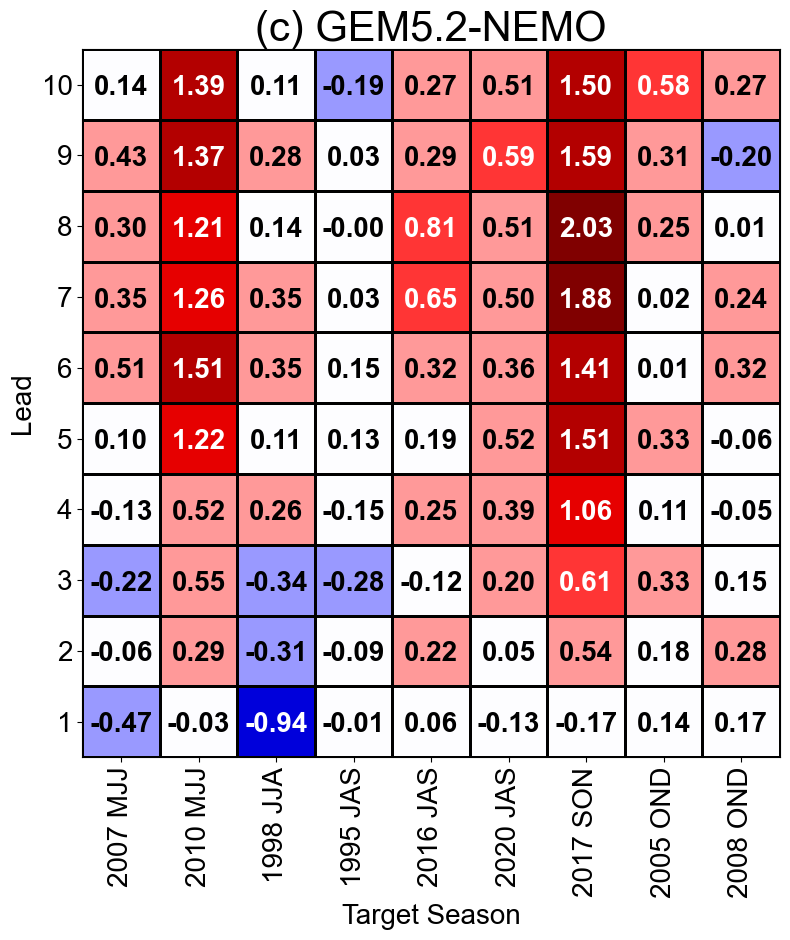

In [192]:
#nemo_cold 

# Extract the x and y values
x = np.arange(len(nemo_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nemo_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/nemo_Cold_Onset_ANOMERR.svg', format='svg')

plt.show()


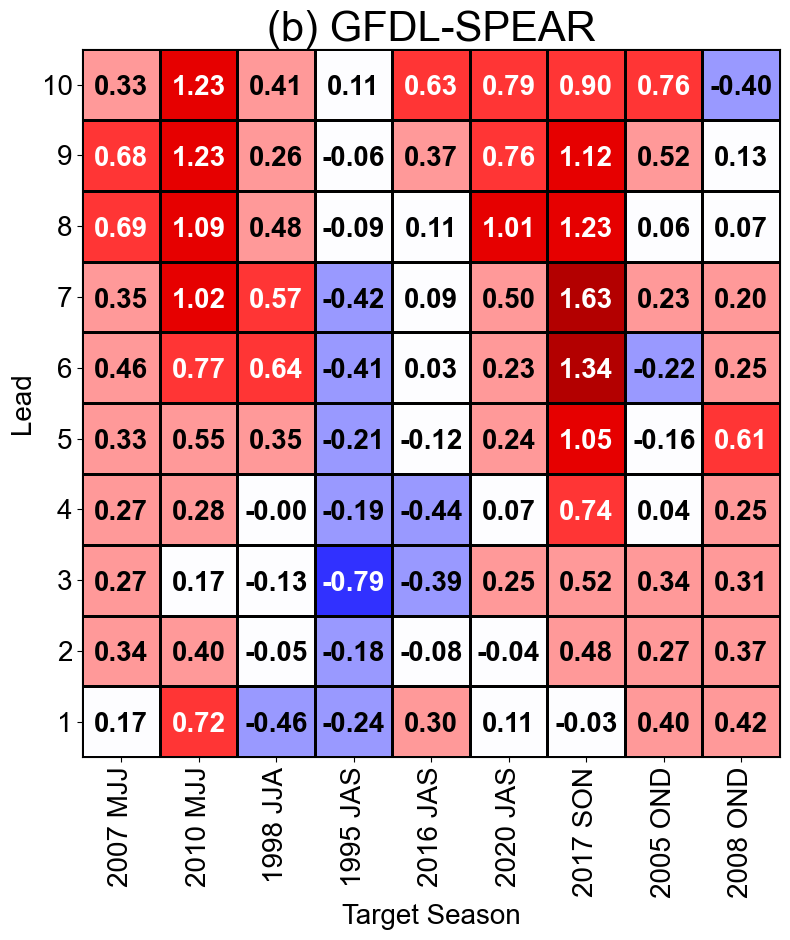

In [193]:
#gfdl_cold 

# Extract the x and y values
x = np.arange(len(gfdl_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(gfdl_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)
boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/gfdl_Cold_Onset_ANOMERR.svg', format='svg')

plt.show()


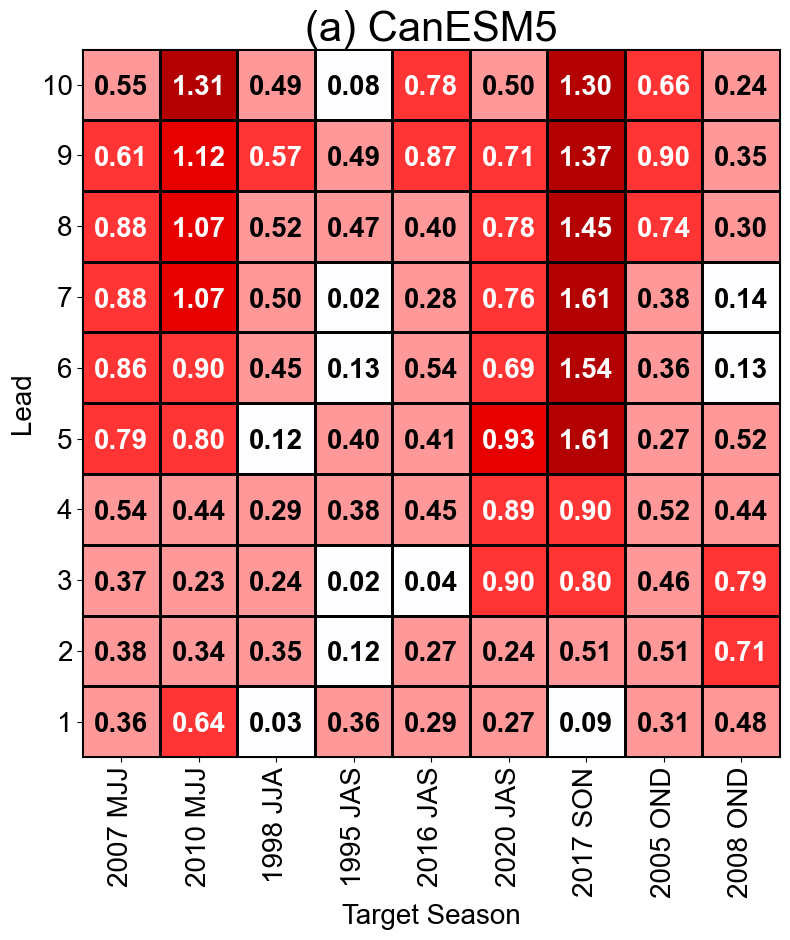

In [194]:
#canesm_cold 

# Extract the x and y values
x = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/canesm_Cold_Onset_ANOMERR.svg', format='svg')

plt.show()


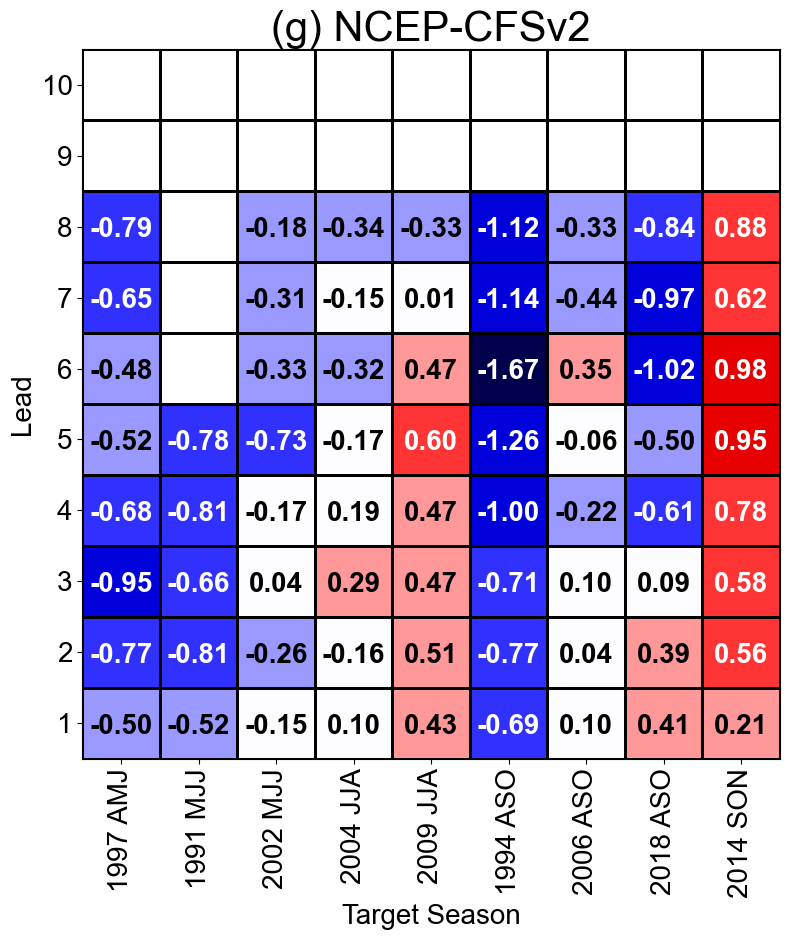

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/ncep_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


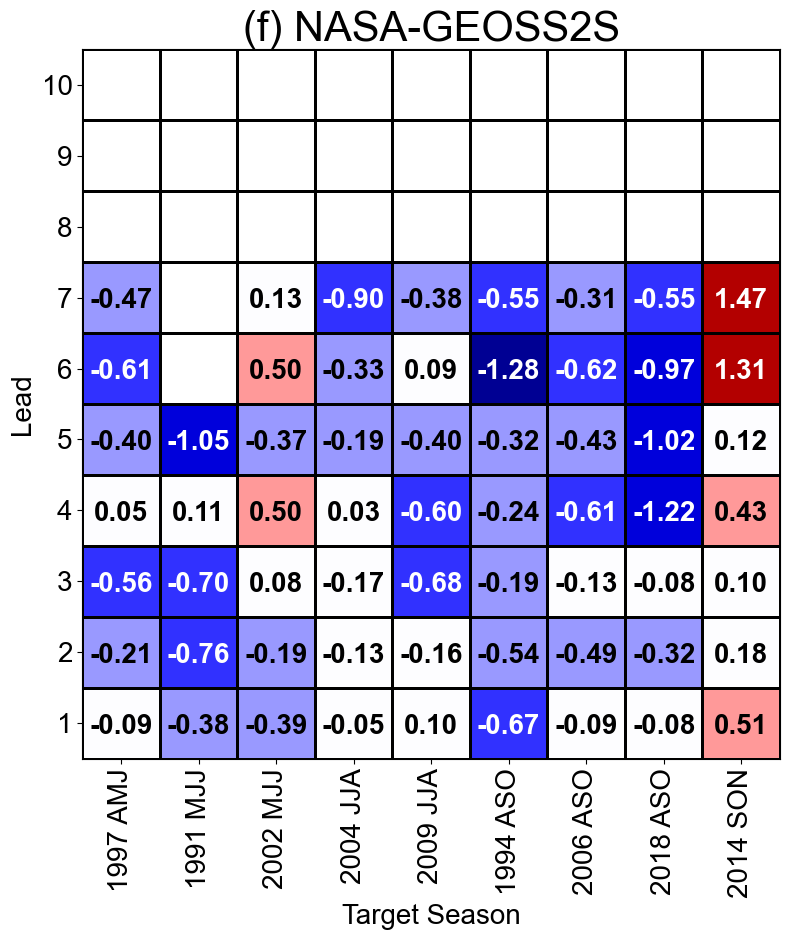

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nasa_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nasa_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/nasa_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


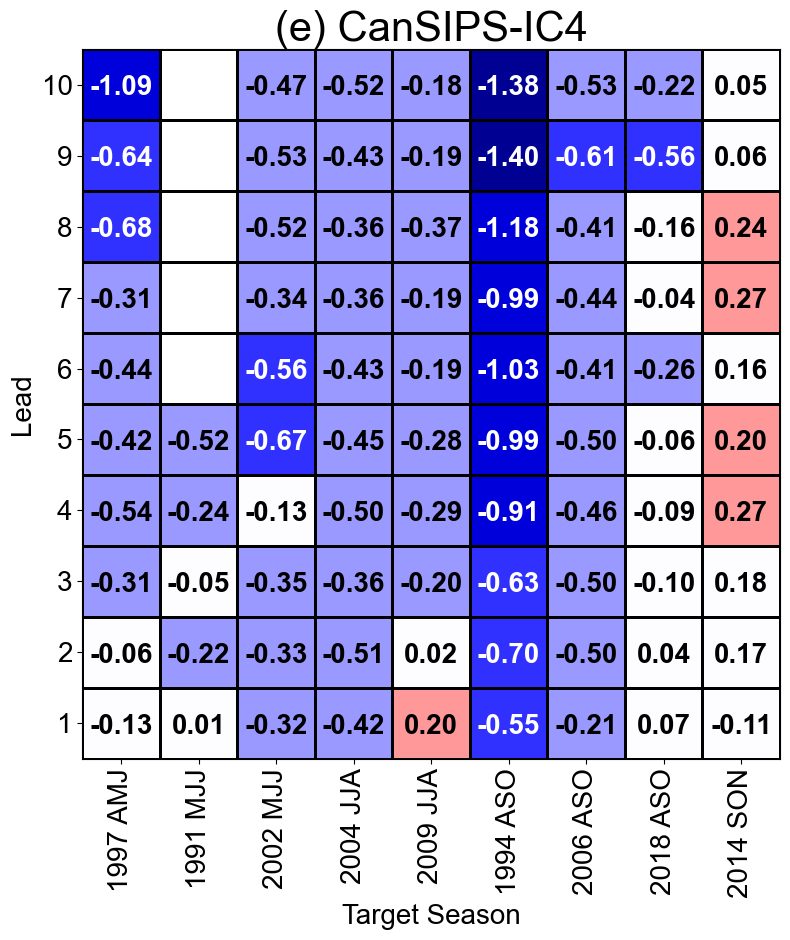

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canada_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canada_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
#new_colors = cmap(np.linspace(0, 1, 10))
#dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
#regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
#new_colors[0] = dark_blue  # Dark blue for the first color
#new_colors[1] = regular_blue  # Regular blue for the second color
#cmap = ListedColormap(new_colors)

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/canada_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


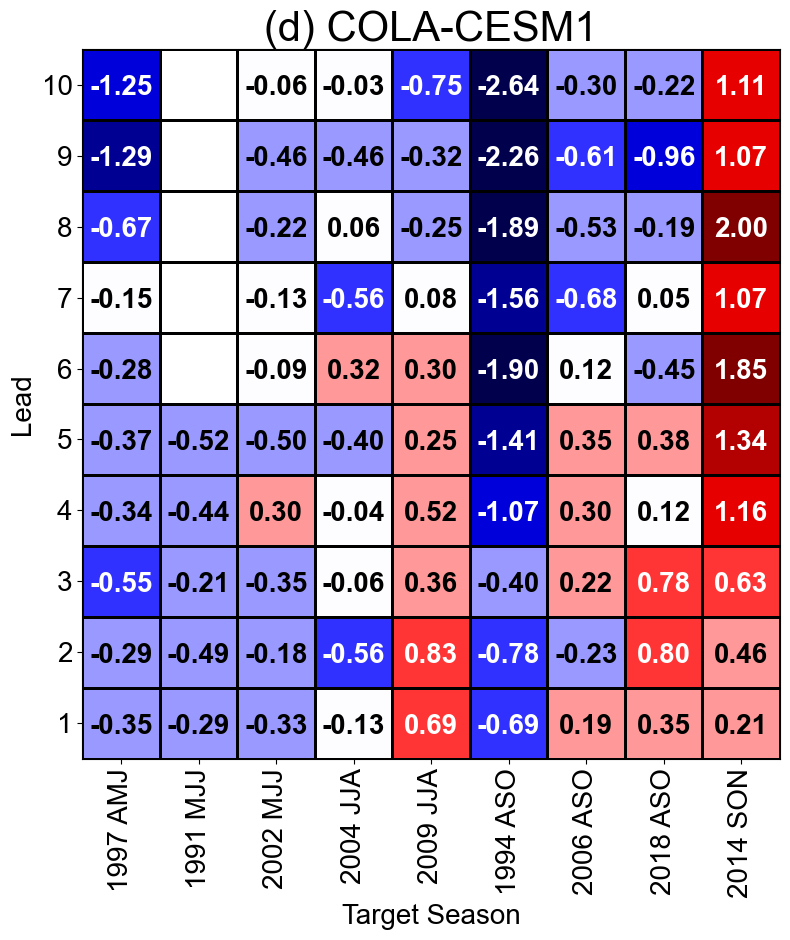

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(cola_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(cola_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color


boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/cola_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


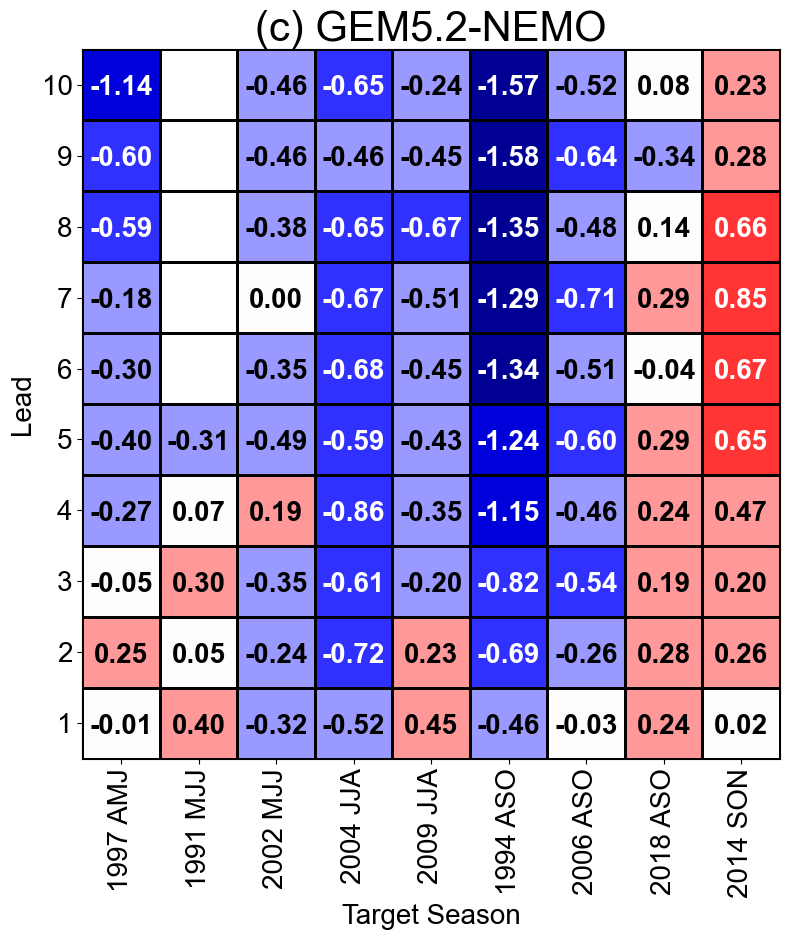

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/nemo_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


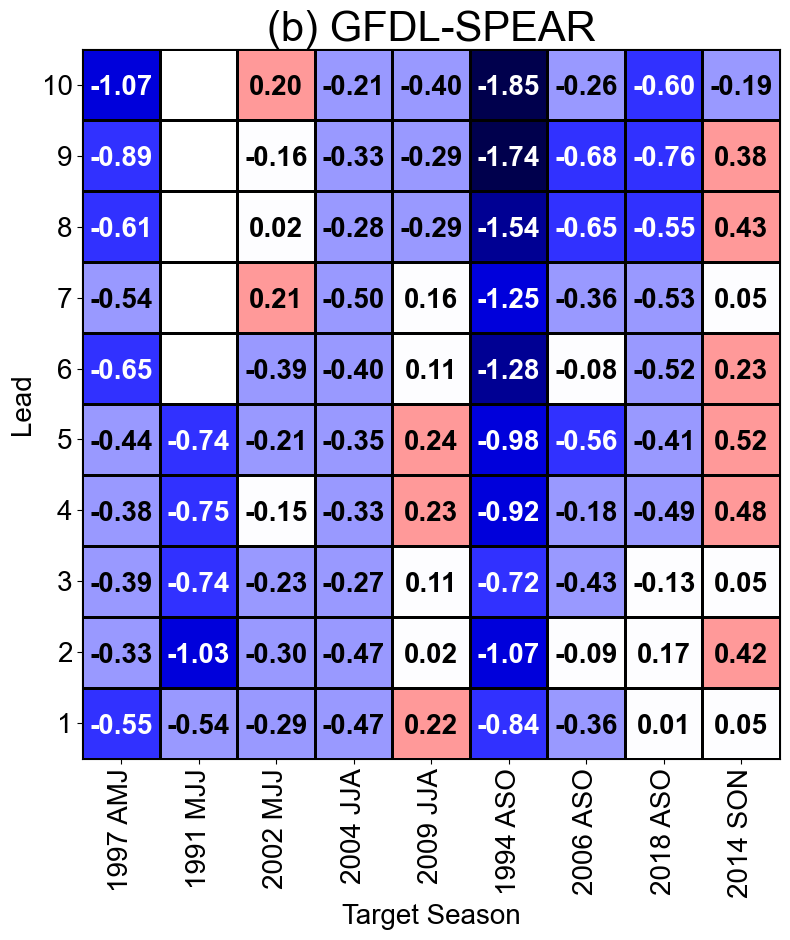

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(gfdl_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(gfdl_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/gfdl_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


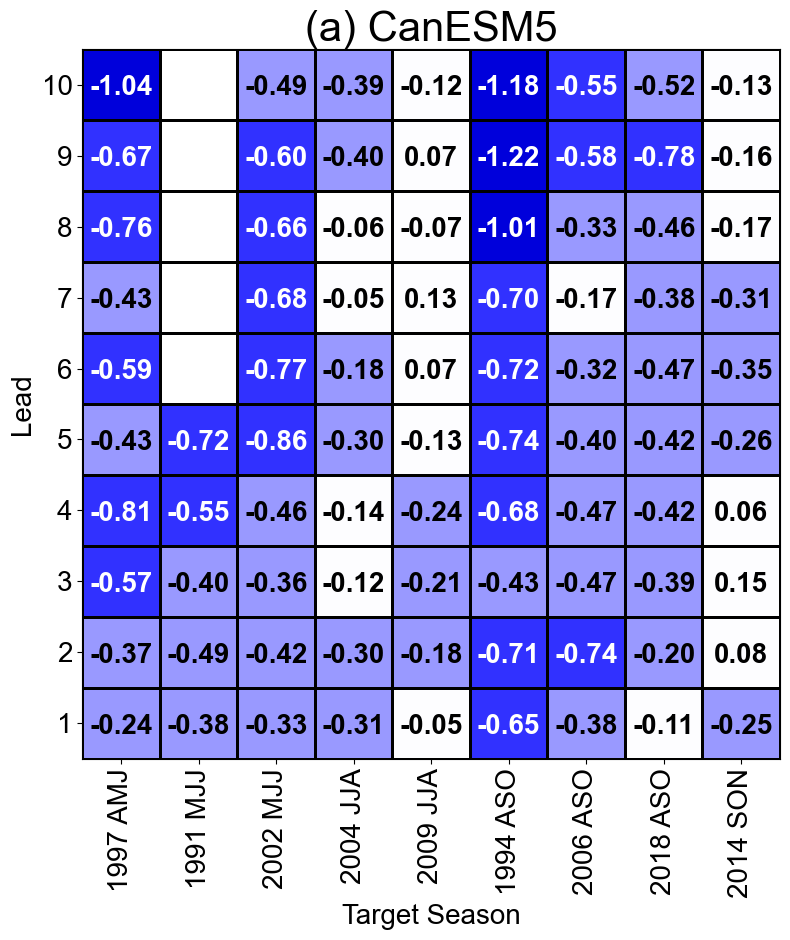

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')


boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='ANOMERR', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/canesm_Warm_Onset_ANOMERR.svg', format='svg')

plt.show()


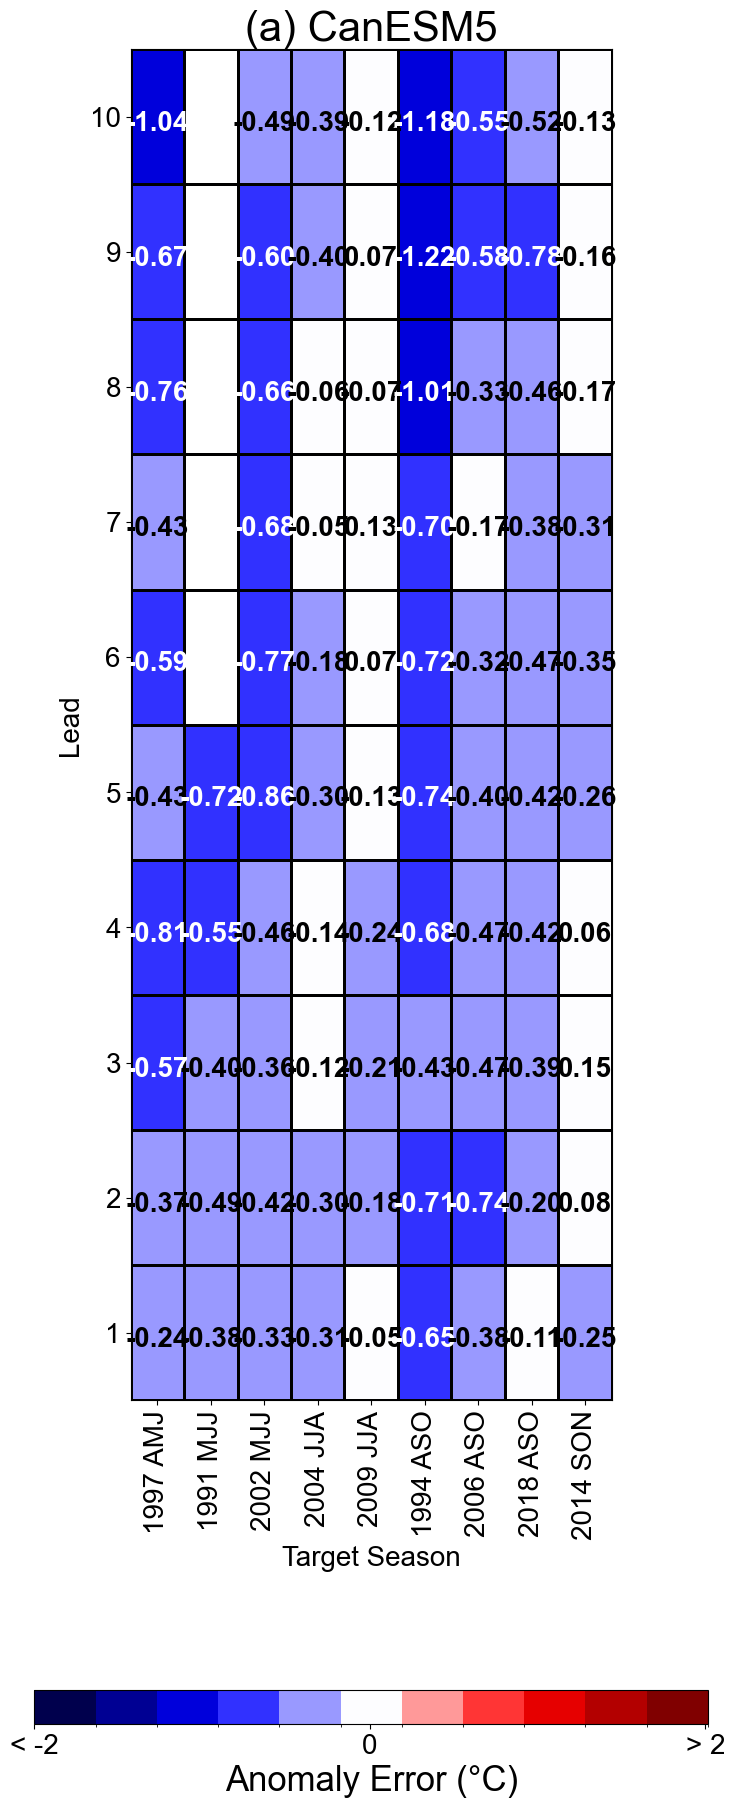

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for 'Lead' times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('seismic')

boundaries = np.arange(-2, 2.25, 0.365)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,20))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar with customization options
cbar = plt.colorbar(c, label='Anomaly Error (°C)', boundaries=boundaries, ticks=boundaries, orientation='horizontal', aspect=20, shrink=1.4)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Anomaly Error (°C)', fontsize=25)
cbar.set_ticks([-2, 0, 2])  # Define the positions of the ticks
cbar.set_ticklabels(['< -2', '0', '> 2'])  # Set custom labels

# Customize colorbar tick parameters
#cbar.ax.tick_params(labelsize=15, length=10, width=2)  # Change the font size, tick length, and tick width here

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/ANOMERR/ERRORBAR.svg', format='svg')

plt.show()


##### 